In [6]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Demographic Data (2007-2008)

SEQN = Respondent sequence number
RIAGENDR = Respondent gender (1= Male , 2= Female)
RIDAGEYR = Respondent age in years
RIDRETH1 = Race and hispanic origin information (1=Mexican American, 2=Other Hispanic, 3=Non-hispanic white, 4=Non-hispanic black, 5=other race - including multiracial)

In [7]:
path_demo = '/Users/hf/Desktop/ICPSR_25505/demographics/25505-0001-Data.tsv'
df_demo = pd.read_csv(path_demo, sep='\t')

In [8]:
keep = ['SEQN','RIDAGEYR', 'RIAGENDR', 'RIDRETH1']
df_demo = df_demo[keep]

In [9]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10149 entries, 0 to 10148
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SEQN      10149 non-null  int64
 1   RIDAGEYR  10149 non-null  int64
 2   RIAGENDR  10149 non-null  int64
 3   RIDRETH1  10149 non-null  int64
dtypes: int64(4)
memory usage: 317.3 KB


In [10]:
df_demo = df_demo.rename(columns={'RIDAGEYR':'Age', 'RIAGENDR':'Gender', 'RIDRETH1':'Race'})
df_demo.head()

,SEQN,Age,Gender,Race
0,41475,62,2,5
1,41476,6,2,5
2,41477,71,1,3
3,41478,1,2,3
4,41479,52,1,1


# Examination Data (2007-2008)

SEQN = Respondent sequence number

BPXSY1 = Systolic blood pressure (mmHg)
BPXDI1 = Diastolic blood pressure (mmHg)
BPXCHR = Hear rate (bpm)
BPXPLS = Pulse rate (bpm)

BMXWT = Weight in kg
BMXHT = height in cm
BMXBMI = BMI (kg/m2)
BMXWAIST = waist cirumference in cm
BMXTRI = tricep skinfold measurement (mm)
BMXSUB = subscapularis skinfold measurment (mm)


Missing:  Available in later years but not in the 2007-2008 data

MGXH1T1 = Muscle grip strength test 1 (hand 1, kg)
MGXH1T2 = Muscle grip strength test 2 (hand 1, kg)
MGXH1T3 = Muscle grip strength test 3 (hand 1, kg)
MGXH2T1 = Muscle grip strength test 1 (hand 2, kg)
MGXH2T2 = Muscle grip strength test 2 (hand 2, kg)
MGXH2T3 = Muscle grip strength test 3 (hand 2, kg)


### Blood Pressure:

BPXSY1 = Systolic blood pressure (mmHg)
BPXDI1 = Diastolic blood pressure (mmHg)
BPXCHR = Hear rate (bpm)
BPXPLS = Pulse rate (bpm)

In [11]:
path_bp = '/Users/hf/Desktop/ICPSR_25505/BP/25505-0011-Data.tsv'
df_bp = pd.read_csv(path_bp, sep='\t', low_memory=False)

In [12]:
df_bp = df_bp[['SEQN', 'BPXSY1', 'BPXDI1', 'BPXCHR', 'BPXPLS']]

In [13]:
df_bp = df_bp.replace(r'^\s+$', np.nan, regex=True)

In [14]:
df_bp.isna().sum()

SEQN         0
BPXSY1    2615
BPXDI1    2615
BPXCHR    7746
BPXPLS    2401
dtype: int64

In [15]:
df_bp.BPXPLS.fillna(df_bp.BPXCHR, inplace=True)

In [16]:
df_bp = df_bp[['SEQN', 'BPXSY1', 'BPXDI1', 'BPXPLS']]
df_bp = df_bp.rename(columns={'BPXSY1':'Systolic BP', 'BPXDI1':'Diastolic BP', 'BPXPLS':'Resting HR'})

In [17]:
df_bp.head()

,SEQN,Systolic BP,Diastolic BP,Resting HR
0,41475,128,64,66
1,41476,NaN,NaN,72
2,41477,144,60,78
3,41478,NaN,NaN,120
4,41479,112,70,62


### Body Measurements:

BMXWT = Weight in kg
BMXHT = height in cm
BMXBMI = BMI (kg/m2)
BMXWAIST = waist cirumference in cm
BMXTRI = tricep skinfold measurement (mm)
BMXSUB = subscapularis skinfold measurment (mm)

In [18]:
path_body = '/Users/hf/Desktop/ICPSR_25505/BodyMeasurements/25505-0012-Data.tsv'
df_body = pd.read_csv(path_body, sep='\t', low_memory=False)

In [19]:
df_body = df_body.rename(columns={'BMXWT':'Weight', 'BMXHT':'Height', 'BMXBMI':'BMI', 'BMXWAIST':'Waist Circumference', 'BMXTRI':'Tricep Skinfold', 'BMXSUB':'Subscap Skinfold'})

In [20]:
df_body = df_body[['SEQN', 'Weight', 'Height', 'BMI', 'Waist Circumference', 'Tricep Skinfold', 'Subscap Skinfold']]

In [21]:
df_body = df_body.replace(r'^\s+$', np.nan, regex=True)

In [22]:
df_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9762 entries, 0 to 9761
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SEQN                 9762 non-null   int64 
 1   Weight               9631 non-null   object
 2   Height               8873 non-null   object
 3   BMI                  8898 non-null   object
 4   Waist Circumference  8538 non-null   object
 5   Tricep Skinfold      8944 non-null   object
 6   Subscap Skinfold     8213 non-null   object
dtypes: int64(1), object(6)
memory usage: 534.0+ KB


### Physical Activity:

PAQ560 - Times per week play or exercise hard
PAQ605 - Vigorous work activity (1=yes, 2=no, 7=refused, 9=dont know)
PAQ620 - Moderate work activity 
PAQ635 - Walk or bicycle at least 10 minutes continuously? (1=Yes, 2=No)
PAQ650 - Vigorous Recreational activity (10 minutes continuous)? 
PAQ665 - Moderate recreational activity
PAD680 - Minutes Sedentary activity (time in a typical day)

In [23]:
path_pa = '/Users/hf/Desktop/ICPSR_25505/PhysicalActivity/25505-0221-Data.tsv'
df_pa = pd.read_csv(path_pa, sep='\t')

In [24]:
df_pa = df_pa[['SEQN', 'PAQ560', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665', 'PAD680']]

In [25]:
df_pa = df_pa.rename(columns={'PAQ560':'Weekly exercise', 'PAQ605':'Vigorous work activity', 'PAQ620':'Moderate work activity', 'PAQ635':'Walk or bicycle', 'PAQ650':'Vigorous recreational activity', 'PAQ665':'Moderate recreational activity', 'PAD680':'Minutes sedentary'})

In [26]:
df_pa = df_pa.replace(r'^\s+$', np.nan, regex=True)

In [27]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9359 entries, 0 to 9358
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   SEQN                            9359 non-null   int64 
 1   Weekly exercise                 1932 non-null   object
 2   Vigorous work activity          7105 non-null   object
 3   Moderate work activity          7105 non-null   object
 4   Walk or bicycle                 7105 non-null   object
 5   Vigorous recreational activity  7105 non-null   object
 6   Moderate recreational activity  7105 non-null   object
 7   Minutes sedentary               7091 non-null   object
dtypes: int64(1), object(7)
memory usage: 585.1+ KB


### Bone Mineral Density:

In [28]:
path_bmd = '/Users/hf/Desktop/ICPSR_25505/DEXA/25505-0013-Data.tsv'
df_bmd = pd.read_csv(path_bmd, sep='\t', usecols = ['SEQN', 'DXXOFBMD', 'DXXNKBMD', 'DXXTRBMD'])

In [29]:
df_bmd = df_bmd.rename(columns={'DXXOFBMD':'Femur BMD', 'DXXNKBMD':'Femoral Neck BMD', 'DXXTRBMD':'Trochanter BMD'})

In [30]:
df_bmd = df_bmd.replace(r'^\s+$', np.nan, regex=True)

In [31]:
df_bmd.head()

,SEQN,Femur BMD,Femoral Neck BMD,Trochanter BMD
0,41475,NaN,NaN,NaN
1,41477,1.001,.901,.723
2,41479,.907,.825,.657
3,41481,1.27,1.129,1.031
4,41482,.972,.791,.718


In [32]:
df_bmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734 entries, 0 to 7733
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SEQN              7734 non-null   int64 
 1   Femur BMD         6517 non-null   object
 2   Femoral Neck BMD  6517 non-null   object
 3   Trochanter BMD    6517 non-null   object
dtypes: int64(1), object(3)
memory usage: 241.8+ KB


### C-Reactive Protein:

CRP (mg/dl)

In [33]:
path_crp = '/Users/hf/Desktop/ICPSR_25505/CRP/25505-0103-Data.tsv'
df_crp = pd.read_csv(path_crp, sep='\t')

In [34]:
df_crp = df_crp[['SEQN', 'LBXCRP']]
df_crp = df_crp.replace(r'^\s+$', np.nan, regex=True)

In [35]:
df_crp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEQN    8712 non-null   int64 
 1   LBXCRP  6809 non-null   object
dtypes: int64(1), object(1)
memory usage: 136.2+ KB


In [36]:
df_crp.head()

,SEQN,LBXCRP
0,41475,1.98
1,41476,NaN
2,41477,.07
3,41479,.02
4,41480,NaN


# Combining seperate dataframes into one dataframe:

In [37]:
from functools import reduce

In [38]:
dfs = [df_demo, df_bp, df_body, df_pa, df_bmd, df_crp]

In [39]:
df_merged = reduce(lambda  left,right: pd.merge(left, right, on=['SEQN'], how='outer'), dfs)

In [40]:
df_merged[df_merged['LBXCRP'].apply(lambda x: x==x)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   SEQN                            6809 non-null   int64 
 1   Age                             6809 non-null   int64 
 2   Gender                          6809 non-null   int64 
 3   Race                            6809 non-null   int64 
 4   Systolic BP                     5984 non-null   object
 5   Diastolic BP                    5984 non-null   object
 6   Resting HR                      6560 non-null   object
 7   Weight                          6715 non-null   object
 8   Height                          6715 non-null   object
 9   BMI                             6711 non-null   object
 10  Waist Circumference             6526 non-null   object
 11  Tricep Skinfold                 6290 non-null   object
 12  Subscap Skinfold                5642 non-null  

# Data Cleaning:

### Percentage of each feature that is missing:

In [41]:
nas=pd.DataFrame(df_merged.isnull().sum().sort_values(ascending=False)/len(df_merged),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
Weekly exercise,0.809636
Femoral Neck BMD,0.357868
Femur BMD,0.357868
Trochanter BMD,0.357868
LBXCRP,0.329096
Minutes sedentary,0.301310
Vigorous work activity,0.299931
Moderate work activity,0.299931
Walk or bicycle,0.299931
Vigorous recreational activity,0.299931


In [42]:
df_merged = df_merged.drop('Weekly exercise', axis=1)

# Addressing NaN

### Femoral Neck BMD (Ignore this for now, likely irrelevent)

In [43]:
df_merged['Femoral Neck BMD'] = df_merged['Femoral Neck BMD'].astype(float)

In [44]:
df_merged['LBXCRP'].isnull().sum()

3340

#### Drop the NaN values for LBXCRP and create a new DF called df_merged2 (very creative, I know)

In [45]:
df_merged2 = df_merged.dropna(how='any', subset=['LBXCRP'])

In [46]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   int64  
 1   Age                             6809 non-null   int64  
 2   Gender                          6809 non-null   int64  
 3   Race                            6809 non-null   int64  
 4   Systolic BP                     5984 non-null   object 
 5   Diastolic BP                    5984 non-null   object 
 6   Resting HR                      6560 non-null   object 
 7   Weight                          6715 non-null   object 
 8   Height                          6715 non-null   object 
 9   BMI                             6711 non-null   object 
 10  Waist Circumference             6526 non-null   object 
 11  Tricep Skinfold                 6290 non-null   object 
 12  Subscap Skinfold                5

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 0 to 10148
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            10149 non-null  int64  
 1   Age                             10149 non-null  int64  
 2   Gender                          10149 non-null  int64  
 3   Race                            10149 non-null  int64  
 4   Systolic BP                     7147 non-null   object 
 5   Diastolic BP                    7147 non-null   object 
 6   Resting HR                      9377 non-null   object 
 7   Weight                          9631 non-null   object 
 8   Height                          8873 non-null   object 
 9   BMI                             8898 non-null   object 
 10  Waist Circumference             8538 non-null   object 
 11  Tricep Skinfold                 8944 non-null   object 
 12  Subscap Skinfold                

##### Here is what I need to do next.  Create a seperate column in my df that has 1 and 0 for drop and keep.  If there is a nan value anywhere in the dataframe it will be 1, if there isn't a nan value in the dataframe we can set is as a 0.  Than, create a boxplot that will show me what all will be dropped and what all will be kept.

In [48]:
df_merged2[df_merged2.isna().any(axis=1)]

,SEQN,Age,Gender,Race,Systolic BP,Diastolic BP,Resting HR,Weight,Height,BMI,...,Vigorous work activity,Moderate work activity,Walk or bicycle,Vigorous recreational activity,Moderate recreational activity,Minutes sedentary,Femur BMD,Femoral Neck BMD,Trochanter BMD,LBXCRP
0,41475,62,2,5,128,64,66,138.9,154.7,58.04,...,2,2,2,2,2,720,NaN,NaN,NaN,1.98
8,41483,66,1,4,110,62,60,133.1,173.8,44.06,...,2,2,2,2,2,60,1.243,0.930,.949,1.49
13,41488,5,1,1,NaN,NaN,110,16.1,103.1,15.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.03
21,41496,64,2,1,192,86,78,67.8,154.6,28.37,...,2,2,2,2,2,15,NaN,NaN,NaN,.62
23,41498,68,1,4,226,96,60,77.4,165.8,28.16,...,2,2,2,2,2,60,1.207,0.930,.904,.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,51596,52,2,1,120,80,62,75.8,146.1,35.51,...,2,1,2,2,2,60,.774,0.652,.453,.44
10128,51603,39,2,3,NaN,NaN,NaN,63.7,172,21.53,...,2,2,1,1,1,540,NaN,NaN,NaN,.07
10135,51610,69,2,1,118,52,68,86.8,147.2,40.06,...,2,2,2,2,2,300,NaN,NaN,NaN,.32
10141,51616,60,1,3,180,62,74,142.6,183.4,42.4,...,2,2,2,2,2,480,NaN,NaN,NaN,.49


In [49]:
df_merged2['NA'] = 0

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_merged2.loc[df_merged2.isna().any(axis=1), "NA"] = 1

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
df_merged2.NA.mean()

0.35041856366573654

In [52]:
df_merged2.NA.sum()

2386

In [53]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   int64  
 1   Age                             6809 non-null   int64  
 2   Gender                          6809 non-null   int64  
 3   Race                            6809 non-null   int64  
 4   Systolic BP                     5984 non-null   object 
 5   Diastolic BP                    5984 non-null   object 
 6   Resting HR                      6560 non-null   object 
 7   Weight                          6715 non-null   object 
 8   Height                          6715 non-null   object 
 9   BMI                             6711 non-null   object 
 10  Waist Circumference             6526 non-null   object 
 11  Tricep Skinfold                 6290 non-null   object 
 12  Subscap Skinfold                5

In [54]:
df_merged2 = df_merged2.astype(float)

In [55]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   float64
 1   Age                             6809 non-null   float64
 2   Gender                          6809 non-null   float64
 3   Race                            6809 non-null   float64
 4   Systolic BP                     5984 non-null   float64
 5   Diastolic BP                    5984 non-null   float64
 6   Resting HR                      6560 non-null   float64
 7   Weight                          6715 non-null   float64
 8   Height                          6715 non-null   float64
 9   BMI                             6711 non-null   float64
 10  Waist Circumference             6526 non-null   float64
 11  Tricep Skinfold                 6290 non-null   float64
 12  Subscap Skinfold                5

### Mean value for columns without NaN values removed

In [56]:
mean = [df_merged2[name].mean() for name in df_merged2.columns]

In [57]:
mean

[46546.12835952416,
 42.4248788368336,
 1.4986047877808784,
 2.787780878249376,
 123.36330213903743,
 68.625,
 75.20579268292683,
 75.09666418466128,
 163.27270290394657,
 27.418675309193972,
 93.54702727551336,
 18.16659777424465,
 19.42339595887966,
 1.8117443868739205,
 1.6186214476369918,
 1.7206782854451248,
 1.7398335688491129,
 1.6178363950384675,
 346.5003145643284,
 0.9741530724213614,
 0.8487446964155095,
 0.7379039868324804,
 0.38520487589954555,
 0.35041856366573654]

### Mean value for columns WITH NaN values removed from the DF

In [58]:
df_dropped = df_merged2.dropna(how='any')

In [59]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 2 to 10147
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            4423 non-null   float64
 1   Age                             4423 non-null   float64
 2   Gender                          4423 non-null   float64
 3   Race                            4423 non-null   float64
 4   Systolic BP                     4423 non-null   float64
 5   Diastolic BP                    4423 non-null   float64
 6   Resting HR                      4423 non-null   float64
 7   Weight                          4423 non-null   float64
 8   Height                          4423 non-null   float64
 9   BMI                             4423 non-null   float64
 10  Waist Circumference             4423 non-null   float64
 11  Tricep Skinfold                 4423 non-null   float64
 12  Subscap Skinfold                4

In [60]:
mean_dropped = [df_dropped[name].mean() for name in df_dropped.columns]

In [61]:
mean_dropped

[46581.75559574949,
 43.7890572009948,
 1.4725299570427313,
 2.7700655663576756,
 122.1537418042053,
 68.3495365136785,
 72.85869319466426,
 74.11921772552576,
 167.3822292561614,
 26.333651367849843,
 92.2018313361974,
 17.502193081618756,
 19.95394528600487,
 1.8017182907528826,
 1.5939407641872032,
 1.7022382997965182,
 1.6981686638028488,
 1.5882884919737734,
 343.92900746099934,
 0.9640782274474313,
 0.8402136558896676,
 0.7316545331223159,
 0.3154736604114797,
 0.0]

### Percent change in the mean for each column value when all NaN values are removed from the DF

In [62]:
list(((np.array(mean_dropped) - np.array(mean))/np.array(mean))*100)

[0.07654178227272351,
 3.2155150505151426,
 -1.7399404399847465,
 -0.6354628525476134,
 -0.9804863471220073,
 -0.4014039873537324,
 -3.120902532279816,
 -1.301584390928469,
 2.516970858645285,
 -3.957244210774477,
 -1.437988975698934,
 -3.657287406714321,
 2.7314962236697005,
 -0.5533946286063809,
 -1.5247965165554702,
 -1.0716695738295052,
 -2.3947638321420084,
 -1.8263838763493487,
 -0.7420792984162442,
 -1.0342157982305566,
 -1.0051362396573413,
 -0.8469196293396982,
 -18.102370933188944,
 -100.0]

In [63]:
df_merged2.groupby('NA').mean().T

NA,0.0,1.0
SEQN,46581.755596,46480.085080
Age,43.789057,39.896060
Gender,1.472530,1.546940
Race,2.770066,2.820620
Systolic BP,122.153742,126.790519
Diastolic BP,68.349537,69.405509
Resting HR,72.858693,80.063641
Weight,74.119218,76.982897
Height,167.382229,155.342321
BMI,26.333651,29.516167


In [64]:
df_dropped = df_merged2[df_merged2['LBXCRP'].apply(lambda x: x==x)]

In [65]:
from scipy.stats import ttest_ind
for col in df_dropped.columns:
    tempna = df_dropped[df_dropped[col].apply(lambda x: x != x)]
    tempnotna = df_dropped[df_dropped[col].apply(lambda x: x == x)]
    difference = tempnotna['LBXCRP'].mean() - tempna['LBXCRP'].mean()
    print(col)
    print ("average na: ", tempna['LBXCRP'].mean())
    print ("average notna: ", tempnotna['LBXCRP'].mean())
    print("difference: ", difference)
    print("percent missing: ", len(tempna)/len(df_dropped))
    print('significance: ', ttest_ind(tempnotna['LBXCRP'],  tempna['LBXCRP']))

SEQN
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Age
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Gender
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Race
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Systolic BP
average na:  0.3321818181818177
average notna:  0.3925150401069494
difference:  0.060333221925131686
percent missing:  0.12116316639741519
significance:  Ttest_indResult(statistic=1.998930255610412, pvalue=0.0456555914416752)
Diastolic BP
average na:  0.3321818181818177
average notna:  0.3925150401069494
difference:  0.060333221925131686
percent missing:  0.1211631

A few notes for me...in the lambda function that Ben coded for me, the use of lambda x: x!=x for a NaN value will always true because CPython follows the IEEE 754 standard for floating point math. NaN is a floating point value for which IEEE 754 dictates that it is not equal to any other floating point value

In [66]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   float64
 1   Age                             6809 non-null   float64
 2   Gender                          6809 non-null   float64
 3   Race                            6809 non-null   float64
 4   Systolic BP                     5984 non-null   float64
 5   Diastolic BP                    5984 non-null   float64
 6   Resting HR                      6560 non-null   float64
 7   Weight                          6715 non-null   float64
 8   Height                          6715 non-null   float64
 9   BMI                             6711 non-null   float64
 10  Waist Circumference             6526 non-null   float64
 11  Tricep Skinfold                 6290 non-null   float64
 12  Subscap Skinfold                5

In [67]:
import missingno as msno

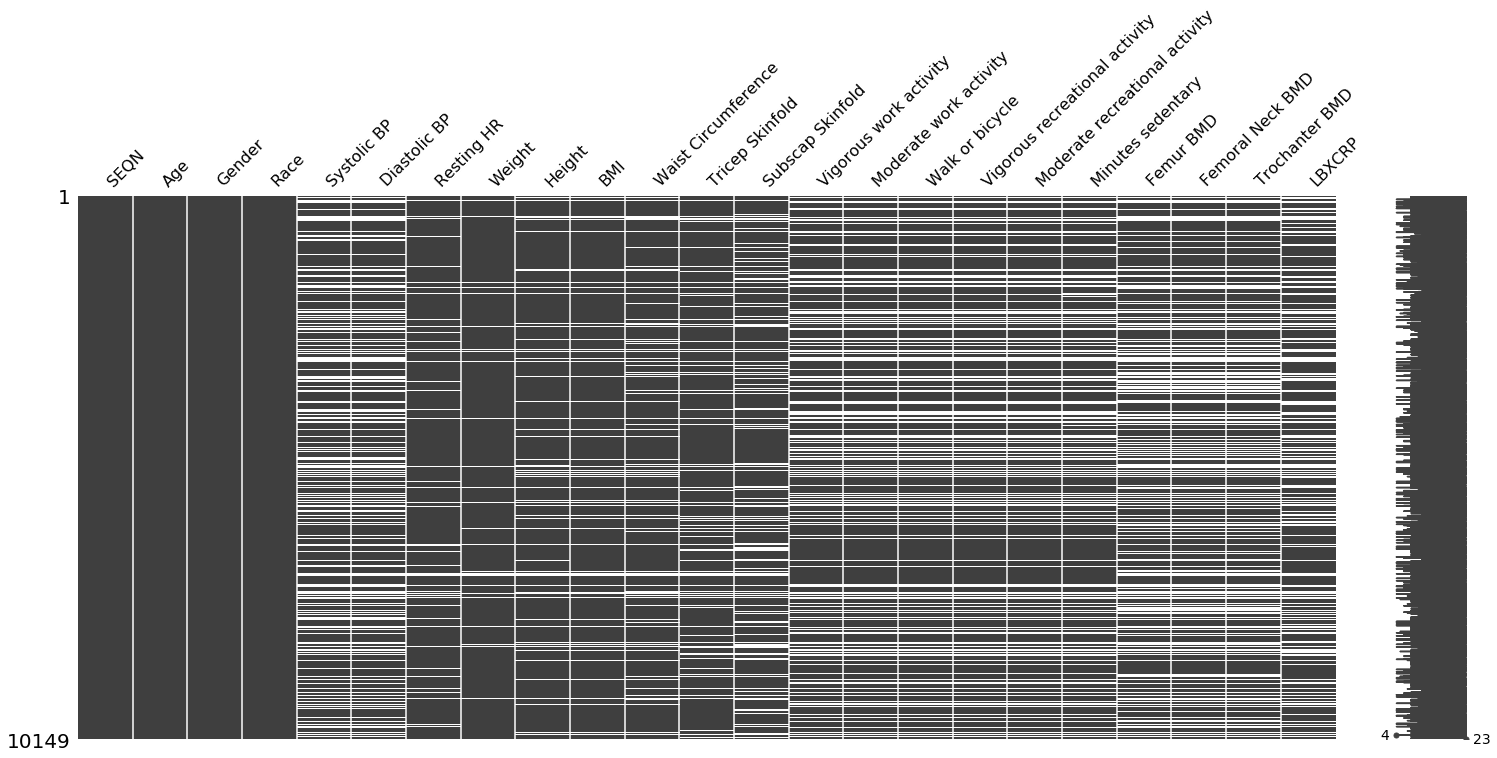

In [68]:
msno.matrix(df_merged)

In [69]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   float64
 1   Age                             6809 non-null   float64
 2   Gender                          6809 non-null   float64
 3   Race                            6809 non-null   float64
 4   Systolic BP                     5984 non-null   float64
 5   Diastolic BP                    5984 non-null   float64
 6   Resting HR                      6560 non-null   float64
 7   Weight                          6715 non-null   float64
 8   Height                          6715 non-null   float64
 9   BMI                             6711 non-null   float64
 10  Waist Circumference             6526 non-null   float64
 11  Tricep Skinfold                 6290 non-null   float64
 12  Subscap Skinfold                5

In [70]:
# from sklearn.impute import KNNImputer
# X = df_merged2.drop(['LBXCRP', 'NA', 'SEQN'], axis=1)
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
# imputer.fit_transform(X)

In [71]:
df_merged2['Weight'].interpolate(methode='linear').describe()

count    6809.000000
mean       75.129079
std        25.025529
min        11.800000
25%        61.300000
50%        74.600000
75%        89.200000
max       218.200000
Name: Weight, dtype: float64

In [72]:
df_merged2['Weight'].describe()

count    6715.000000
mean       75.096664
std        25.106920
min        11.800000
25%        61.100000
50%        74.500000
75%        89.200000
max       218.200000
Name: Weight, dtype: float64

In [73]:
((M - M_interp)/M_interp)*100

NameError: name 'M' is not defined

In [74]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 0 to 10148
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            10149 non-null  int64  
 1   Age                             10149 non-null  int64  
 2   Gender                          10149 non-null  int64  
 3   Race                            10149 non-null  int64  
 4   Systolic BP                     7147 non-null   object 
 5   Diastolic BP                    7147 non-null   object 
 6   Resting HR                      9377 non-null   object 
 7   Weight                          9631 non-null   object 
 8   Height                          8873 non-null   object 
 9   BMI                             8898 non-null   object 
 10  Waist Circumference             8538 non-null   object 
 11  Tricep Skinfold                 8944 non-null   object 
 12  Subscap Skinfold                

In [75]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   float64
 1   Age                             6809 non-null   float64
 2   Gender                          6809 non-null   float64
 3   Race                            6809 non-null   float64
 4   Systolic BP                     5984 non-null   float64
 5   Diastolic BP                    5984 non-null   float64
 6   Resting HR                      6560 non-null   float64
 7   Weight                          6715 non-null   float64
 8   Height                          6715 non-null   float64
 9   BMI                             6711 non-null   float64
 10  Waist Circumference             6526 non-null   float64
 11  Tricep Skinfold                 6290 non-null   float64
 12  Subscap Skinfold                5

In [76]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 10148
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6809 non-null   float64
 1   Age                             6809 non-null   float64
 2   Gender                          6809 non-null   float64
 3   Race                            6809 non-null   float64
 4   Systolic BP                     5984 non-null   float64
 5   Diastolic BP                    5984 non-null   float64
 6   Resting HR                      6560 non-null   float64
 7   Weight                          6715 non-null   float64
 8   Height                          6715 non-null   float64
 9   BMI                             6711 non-null   float64
 10  Waist Circumference             6526 non-null   float64
 11  Tricep Skinfold                 6290 non-null   float64
 12  Subscap Skinfold                5

In [77]:
df_merged = df_merged.astype(float)

Making a boxplot for the below loop is proving to be a pain in the ass.  I can create a seaborn boxplot but when it runs the loop they all get mashed together into an unreadable pile of shit.  If i try using matplotlib instead it freaks out at the NaN values and throws a bunch of runtime errors.  All I want to do is generate 2 boxplots for each feature comparing how NaN values in that feature effect the values for LBXCRP (with NaN values in-tact and with them removed)

In [78]:
for col in df_merged.columns:
    #The below code creates a temporary DF where the values for the selected column are NaN
    tempna = df_merged[df_merged[col].apply(lambda x: x != x)]
    
    #This code creates a temporary DF where the values for the selected column are not NaN
    tempnotna = df_merged[df_merged[col].apply(lambda x: x == x)]
    
    #This code looks at the difference in the mean() value of the 'LBXCRP' column for the two 
    #temporary DF's created above 
    difference = tempnotna['LBXCRP'].mean() - tempna['LBXCRP'].mean()
    
    #na.append(tempna['LBXCRP'])
    #notna.append(tempnotna['LBXCRP'])
    #Print out the column name
    print(col)
    
    #print out the average value of LBXCRP for the above named column where the column is NaN
    print ("average na: ", tempna['LBXCRP'].mean())
    
    #Print out the average value of LBXCRP for the above named column where the column is not
    #NaN
    print ("average notna: ", tempnotna['LBXCRP'].mean())
    
    #Print the difference in the mean() value of LBXCRP for the above named column between
    #where the column is NaN and not NaN
    print("difference: ", difference)
    
    #print the percentage of data that is missing if the NaN values for this column are dropped
    print("percent missing: ", (len(tempna)/len(df_merged))*100)
    
    print('significance: ', ttest_ind(tempnotna['LBXCRP'],  tempna['LBXCRP']))
    

SEQN
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Age
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Gender
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Race
average na:  nan
average notna:  0.38520487589954555
difference:  nan
percent missing:  0.0
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Systolic BP
average na:  0.3321818181818177
average notna:  0.3925150401069494
difference:  0.060333221925131686
percent missing:  29.579268893487043
significance:  Ttest_indResult(statistic=nan, pvalue=nan)
Diastolic BP
average na:  0.3321818181818177
average notna:  0.3925150401069494
difference:  0.060333221925131686
percent missing:  29.579268893487043
significance:  Ttest

In [ ]:
#The below code creates a temporary DF where the values for the selected column are NaN
tempna = df_merged[df_merged['Weight'].apply(lambda x: x != x)]
    
#This code creates a temporary DF where the values for the selected column are not NaN
tempnotna = df_merged[df_merged['Weight'].apply(lambda x: x == x)]

In [ ]:
print('Mean: ', tempnotna['LBXCRP'].mean())
print('Min: ', tempnotna['LBXCRP'].min())
print('25%: ', tempnotna['LBXCRP'].quantile(0.25))
print('50%: ', tempnotna['LBXCRP'].quantile(0.5))
print('75%: ', tempnotna['LBXCRP'].quantile(0.75))
print('Max: ', tempnotna['LBXCRP'].max())

plot = sns.boxplot(tempnotna['LBXCRP'], showfliers=False, width=0.5)

In [ ]:
print('Mean: ', tempna['LBXCRP'].mean())
print('Min: ', tempna['LBXCRP'].min())
print('25%: ', tempna['LBXCRP'].quantile(0.25))
print('50%: ', tempna['LBXCRP'].quantile(0.5))
print('75%: ', tempna['LBXCRP'].quantile(0.75))
print('Max: ', tempna['LBXCRP'].max())

plot = sns.boxplot(tempna['LBXCRP'], showfliers=False, width=0.5)

## Boxplot for 'Age':

In [ ]:
#The below code creates a temporary DF where the values for the selected column are NaN
tempna_age = df_merged[df_merged['Age'].apply(lambda x: x != x)]
    
#This code creates a temporary DF where the values for the selected column are not NaN
tempnotna_age = df_merged[df_merged['Age'].apply(lambda x: x == x)]

There will be no difference for LBXCRP since there are no missing or NaN values in this feature

In [ ]:
fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Age'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_age['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r').set_title("With NaN")
ax2 = sns.boxplot(tempna_age['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1]).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Systolic BP':

In [ ]:
tempna_SBP = df_merged[df_merged['Systolic BP'].apply(lambda x: x != x)]
tempnotna_SBP = df_merged[df_merged['Systolic BP'].apply(lambda x: x == x)]

fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Systolic BP'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_SBP['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("With NaN")
ax2 = sns.boxplot(tempna_SBP['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Diastolic BP':

In [ ]:
tempna_DBP = df_merged[df_merged['Diastolic BP'].apply(lambda x: x != x)]
tempnotna_DBP = df_merged[df_merged['Diastolic BP'].apply(lambda x: x == x)]

fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Diastolic BP'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_DBP['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("With NaN")
ax2 = sns.boxplot(tempna_DBP['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Resting HR':

In [ ]:
tempna_RHR = df_merged[df_merged['Resting HR'].apply(lambda x: x != x)]
tempnotna_RHR = df_merged[df_merged['Resting HR'].apply(lambda x: x == x)]

fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Resting HR'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_RHR['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("With NaN")
ax2 = sns.boxplot(tempna_RHR['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Weight":

In [ ]:
tempna_weight = df_merged[df_merged['Weight'].apply(lambda x: x != x)]
tempnotna_weight = df_merged[df_merged['Weight'].apply(lambda x: x == x)]


fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Weight'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_weight['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("With NaN")
ax2 = sns.boxplot(tempna_weight['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Height":

In [ ]:
tempna_height = df_merged[df_merged['Height'].apply(lambda x: x != x)]
tempnotna_height = df_merged[df_merged['Height'].apply(lambda x: x == x)]


fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Height'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_height['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r',showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("With NaN")
ax2 = sns.boxplot(tempna_height['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'BMI':

In [ ]:
tempna_bmi = df_merged[df_merged['BMI'].apply(lambda x: x != x)]
tempnotna_bmi = df_merged[df_merged['BMI'].apply(lambda x: x == x)]


fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['BMI'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_bmi['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("With NaN")
ax2 = sns.boxplot(tempna_bmi['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Waist Circumference':

In [ ]:
tempna_waist = df_merged[df_merged['Waist Circumference'].apply(lambda x: x != x)]
tempnotna_waist = df_merged[df_merged['Waist Circumference'].apply(lambda x: x == x)]


fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Waist Circumference'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_waist['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r').set_title("With NaN")
ax2 = sns.boxplot(tempna_waist['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1]).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Tricep Skinfold':

In [ ]:
tempna_tricep = df_merged[df_merged['Tricep Skinfold'].apply(lambda x: x != x)]
tempnotna_tricep = df_merged[df_merged['Tricep Skinfold'].apply(lambda x: x == x)]


fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Tricep Skinfold'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_tricep['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r').set_title("With NaN")
ax2 = sns.boxplot(tempna_tricep['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1]).set_title("Without NaN")
plt.subplots_adjust(top=.8)

## Boxplot for 'Subscap Skinfold':

In [ ]:
tempna_subscap = df_merged[df_merged['Subscap Skinfold'].apply(lambda x: x != x)]
tempnotna_subscap = df_merged[df_merged['Subscap Skinfold'].apply(lambda x: x == x)]


fix, axes = plt.subplots(1,2)
plt.suptitle("Comparison in LBXCRP with NaN values from df_merged['Subscap Skinfold'] preserved (Red) or removed (Blue)", fontsize=14)
ax1 = sns.boxplot(tempnotna_subscap['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[0], color='r').set_title("With NaN")
ax2 = sns.boxplot(tempna_subscap['LBXCRP'], showfliers=False, width=0.75, orient='v', ax=axes[1]).set_title("Without NaN")
plt.subplots_adjust(top=.8)

In [ ]:
df_merged.columns

In [ ]:
plt.hist(df_merged['LBXCRP'].apply(np.log))
plt.show()

In [ ]:
plt.hist(df_merged['Weight'])
plt.show()

Looks like we need to use LBXCRP values as a log.

In [ ]:
sns.scatterplot(df_merged['Weight'], df_merged['LBXCRP'].apply(np.log))


In [81]:
path_data = '/Users/hf/Desktop/Capstone1/data/'
df_merged.to_csv(path_data+'raw_data.csv')